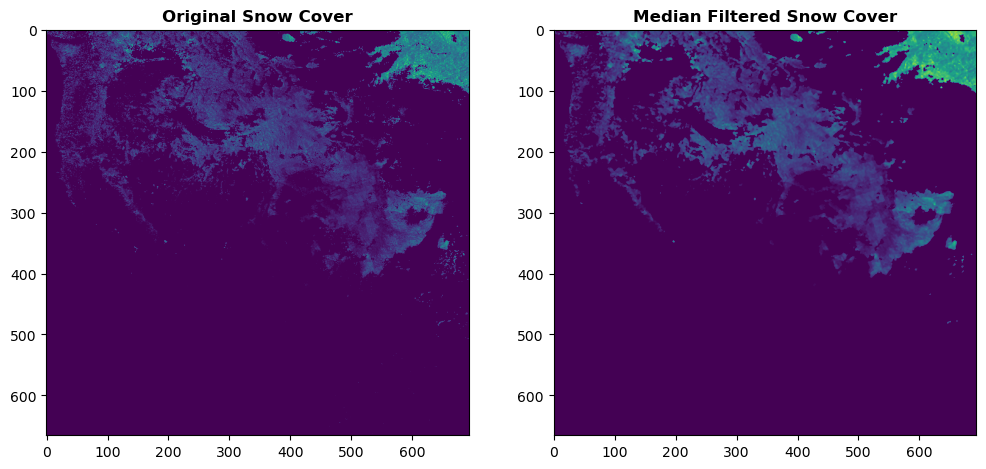

In [2]:
import rasterio
from rasterio import plot
from scipy.ndimage import median_filter
import matplotlib.pyplot as plt

# Step 1: Read the raster data
input_raster_path = '/home/jovyan/shared-public/ml_swe_monitoring_prod/swe_predicted_2023-12-15.tif'
with rasterio.open(input_raster_path) as src:
    snow_data = src.read(1)
    profile = src.profile

# Step 2: Apply median filtering
# Define the size of the filter (e.g., 3x3 window)
filtered_snow = median_filter(snow_data, size=3)

# Step 3: Save the filtered raster
output_raster_path = '/home/jovyan/shared-public/ml_swe_monitoring_prod/swe_predicted_2023-12-15_median_filtered.tif'
with rasterio.open(output_raster_path, 'w', **profile) as dst:
    dst.write(filtered_snow, 1)

# Optional: Plotting for visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
plot.show(snow_data, ax=ax1, title='Original Snow Cover')
plot.show(filtered_snow, ax=ax2, title='Median Filtered Snow Cover')
plt.show()


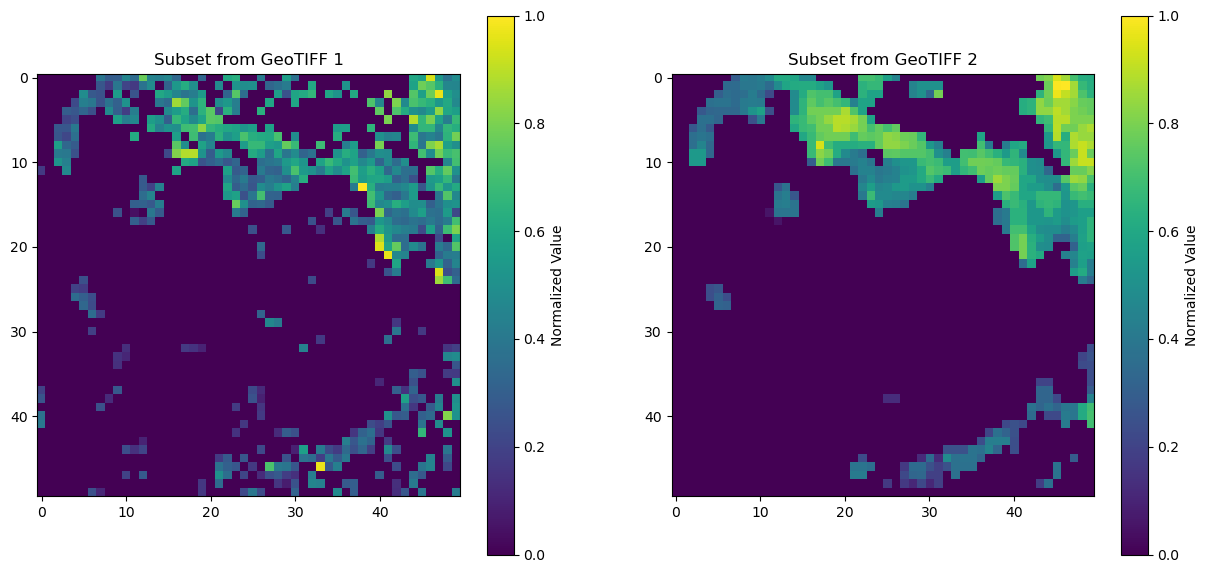

In [11]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np

# Function to display subsets of two GeoTIFF images side by side
def compare_geotiff_subsets(filepath1, filepath2, subset_window):
    # Open the first GeoTIFF file and read the subset
    with rasterio.open(filepath1) as src1:
        subset1 = src1.read(1, window=subset_window)
        
    # Open the second GeoTIFF file and read the subset
    with rasterio.open(filepath2) as src2:
        subset2 = src2.read(1, window=subset_window)
        
    # Normalize the data for better color visualization
    subset1_normalized = (subset1 - subset1.min()) / (subset1.max() - subset1.min())
    subset2_normalized = (subset2 - subset2.min()) / (subset2.max() - subset2.min())
    
    # Plot the two subsets side by side
    plt.figure(figsize=(15, 7))
    
    # Plot the first subset
    plt.subplot(1, 2, 1)
    plt.title("Subset from GeoTIFF 1")
    plt.imshow(subset1_normalized, cmap='viridis')
    plt.colorbar(label='Normalized Value')
    
    # Plot the second subset
    plt.subplot(1, 2, 2)
    plt.title("Subset from GeoTIFF 2")
    plt.imshow(subset2_normalized, cmap='viridis')
    plt.colorbar(label='Normalized Value')
    
    plt.show()

# Example usage
filepath1 = input_raster_path  # Replace with your first GeoTIFF file path
filepath2 = output_raster_path  # Replace with your second GeoTIFF file path

# Define the window (start_x, start_y, width, height) for the subset
# Adjust these values based on your image
subset_window = rasterio.windows.Window(200, 200, 50, 50)

# Display the subsets side by side
compare_geotiff_subsets(filepath1, filepath2, subset_window)


In [13]:
# Try more filtering
# Apply morphological closing
from skimage.morphology import closing, disk

snow_data_morphology_cleaned = closing(filtered_snow, disk(1))

# Save the final cleaned snow cover
final_morphology_output_path = '/home/jovyan/shared-public/ml_swe_monitoring_prod/swe_predicted_2023-12-15_median_filtered_morphology.tif'
with rasterio.open(final_morphology_output_path, 'w', **profile) as dst:
    dst.write(snow_data_morphology_cleaned, 1)

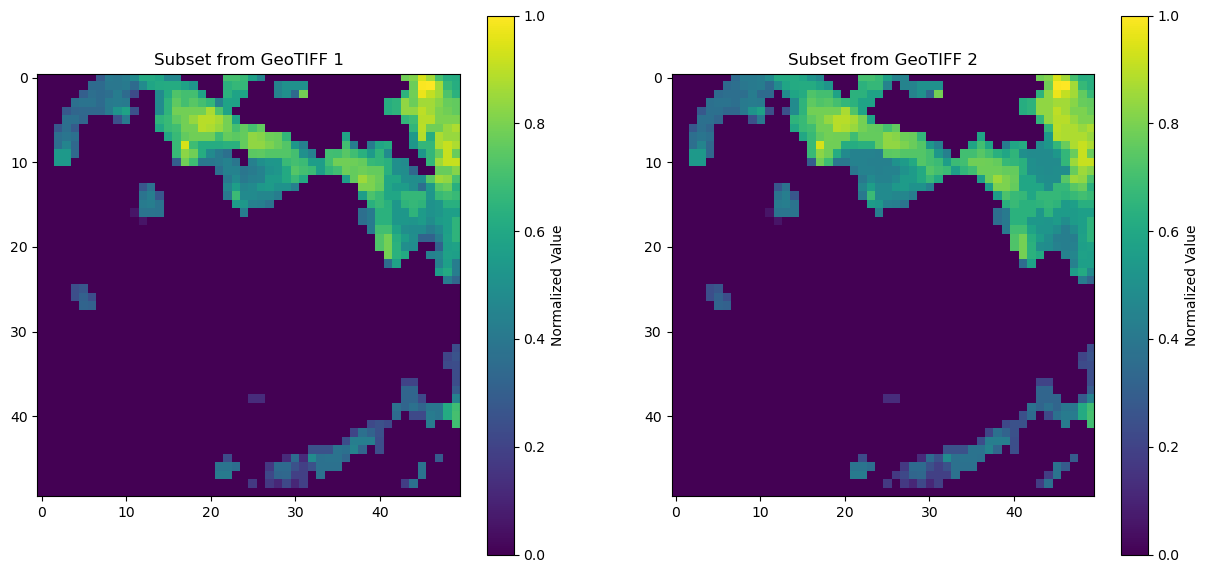

In [16]:
# Display the subsets side by side
compare_geotiff_subsets(output_raster_path, final_morphology_output_path, subset_window)